<a href="https://colab.research.google.com/github/NahanTrindade/Python-Pandas/blob/main/python-pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [4]:
df = pd.read_excel('AdventureWorks.xlsx')

In [ ]:
df.head(10)

In [7]:
df.shape

(904, 16)

In [8]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [9]:
df['Valor Venda'].sum()

5984606.1426

In [11]:
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])

In [12]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [13]:
round(df['Custo'].sum(),2)

2486783.05

In [14]:
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [15]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [16]:
round(df['Lucro'].sum(),2)

3497823.09

In [18]:
df['Tempo_Envio'] = df['Data Envio'] - df['Data Venda']

In [21]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [20]:
df['Tempo_Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [23]:
df['Tempo_Envio'].dtypes

dtype('int64')

In [24]:
df.groupby('Marca')['Tempo_Envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_Envio, dtype: float64

In [26]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_Envio       0
dtype: int64

In [30]:
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [29]:
pd.options.display.float_format = '{:20,.2f}'.format

In [31]:
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [33]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending= False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

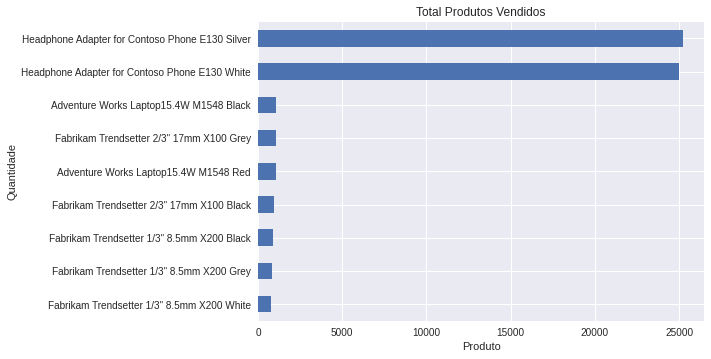

In [35]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending= True).plot.barh(title= "Total Produtos Vendidos")
plt.xlabel('Produto')
plt.ylabel('Quantidade');

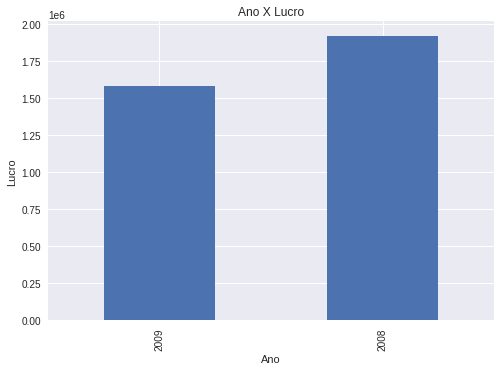

In [42]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().sort_values().plot.bar(title= 'Ano X Lucro')
plt.xlabel('Ano')
plt.ylabel('Lucro');

In [41]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [44]:
df_2009 = df[df['Data Venda'].dt.year == 2009]
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


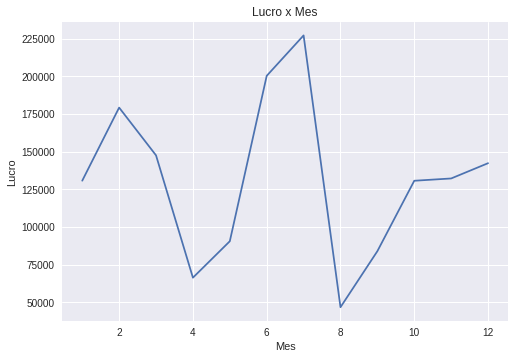

In [48]:
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title="Lucro x Mes")
plt.xlabel('Mes')
plt.ylabel('Lucro');

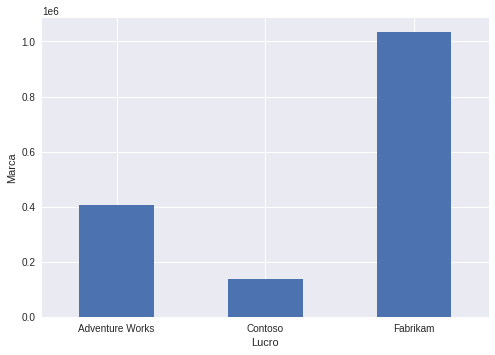

In [54]:
df_2009.groupby('Marca')['Lucro'].sum().plot.bar('Lucro de cada marca')
plt.xlabel('Lucro')
plt.ylabel('Marca')
plt.xticks(rotation='horizontal');

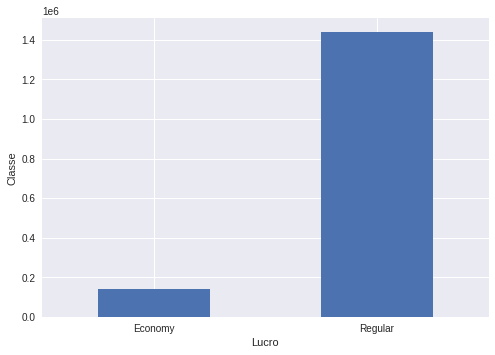

In [55]:
df_2009.groupby('Classe')['Lucro'].sum().plot.bar('Classe x Lucro')
plt.xlabel('Lucro')
plt.ylabel('Classe')
plt.xticks(rotation='horizontal');

In [61]:
df['Tempo_Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_Envio, dtype: float64

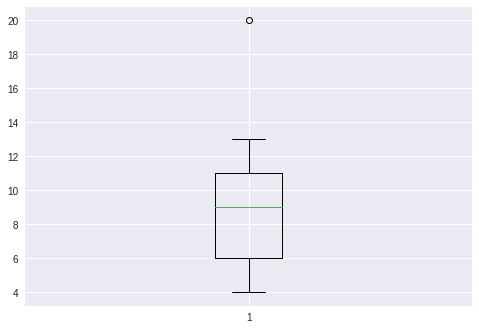

In [63]:
plt.boxplot(df['Tempo_Envio']);

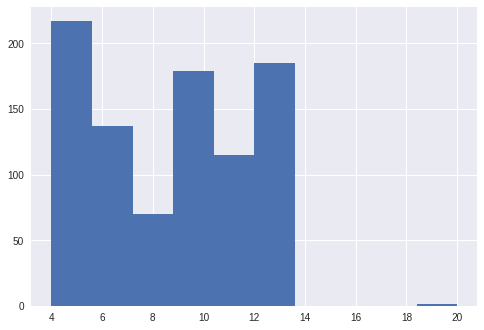

In [64]:
plt.hist(df['Tempo_Envio']);

In [65]:
df['Tempo_Envio'].min()

4

In [66]:
df['Tempo_Envio'].max()

20

In [69]:
df[df['Tempo_Envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [70]:
from tables import index
df.to_csv('df_vendas_novo.csv', index=False)